In [13]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import AutoMinorLocator
# local imports
import DataAndPlotting as my

# Data

In [14]:
# store files names for all datasets
filenames: dict[str,str] = {
#    'ap2_t1'    : my.path_data + '1-ap2_t1.csv', 
#    'ap2_t2'    : my.path_data + '2-ap2_t2.csv', 
    'ap2' : my.path_data + '3-ap2_t0.csv',
    'ap4' : my.path_data + '5-ap4_t0.csv',
    'ap8' : my.path_data + '4-ap8_t0.csv'

} # ap==aperture, t==trial

tables: dict[str, dict[str, np.array]] = my.UnpackAllTables(filenames)

ap2 columns:	 ['VAK [V]', 'I_356 [1e-13 A]', 'I_405 [1e-13 A]', 'I_436 [1e-13 A]', 'I_546 [1e-13 A]', 'I_577 [1e-13 A]']
ap4 columns:	 ['VAK [V]', 'I_356 [1e-13 A]', 'I_405 [1e-13 A]', 'I_436 [1e-13 A]', 'I_546 [1e-13 A]', 'I_577 [1e-13 A]']
ap8 columns:	 ['VAK [V]', 'I_356 [1e-13 A]', 'I_405 [1e-13 A]', 'I_436 [1e-13 A]', 'I_546 [1e-13 A]', 'I_577 [1e-13 A]']


In [15]:
# https://coolors.co/e800ae-a600ff-1e00ff-71e900-f1a100
colorDict = {
    '356 nm' : '#e800ae', # '#000000',
    '405 nm' : '#a600ff', # '#8200c8',
    '436 nm' : '#1e00ff', # '#1d00ff',
    '546 nm' : '#71E900', # '#96ff00',
    '577 nm' : '#F1A100', # '#f6ff00',
}
colors1 = list(colorDict.values())
colors2 = [my.darken_color(c, 1.15) for c in colors1]
colors3 = [my.darken_color(c, 1.15) for c in colors2]

# Plot

In [16]:
def MaskNan(x,y) :
    if(len(x)!=len(y)) : raise Exception ("X and Y lengths do not match.") 
    # build mask that is False where a nan occurs in y
    mask = np.ones(len(x), dtype=bool)
    mask[ np.argwhere(np.isnan(y)) ] = False 
    # apply mask and return arrays
    return(x[mask], y[mask])

In [17]:
def PlotXmanyY(
    x: list[np.array], # x axis data points
    y: list[np.array], # y axis data points
    yleg : list[str], # legend lables 
    c : list, # colors
    vlines: list[float] = [], # plot vertical lines
    xerr: float = 0,    # error on x axis
    yerr: float = 0,    # error on y axis
    xlab: str = '', # label on x axis 
    ylab: str = '', # label on y axis
    linestyle = '-',   # style of xy curve line
    xlim: list = None,  # x axis range 
    ylim: list = None,  # y axis range 
    logScale: bool = False,
    fileName: str = ''  # filename to save the figure as
) : 
    """Plotting function for x and y data arrays."""
    # formatting 
    my.SetStyle()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if(xlim != None) : plt.xlim(xlim)
    if(ylim != None) : plt.ylim(ylim)
    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    if(logScale) : ax.set_yscale('log')
    for v in vlines : 
        plt.axvline(v, c='k',linewidth=0.8)
    # data
    for xi,yi,yl,ci in zip(x,y,yleg,c) : 
        xx, yy = MaskNan(xi,yi)
        plt.errorbar(xx, yy, yerr=yerr, xerr=xerr, elinewidth=1.5, c=ci, linestyle=linestyle, linewidth=0.5, label=yl)
    if( yleg[0] != None) : plt.legend(loc='upper left')
    # finish 
    if(fileName != '') : my.Save(fileName)
    plt.show()

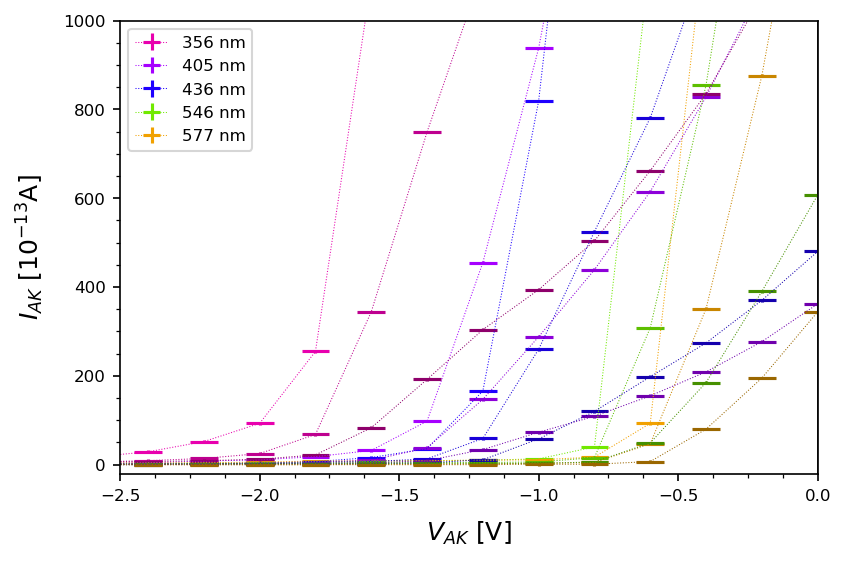

In [18]:
PlotXmanyY(
    x = [tables['ap8']['VAK [V]']]*5 + [tables['ap4']['VAK [V]']]*5 + [tables['ap2']['VAK [V]']]*5,
    y = [
        tables['ap8']['I_356 [1e-13 A]'], 
        tables['ap8']['I_405 [1e-13 A]'], 
        tables['ap8']['I_436 [1e-13 A]'], 
        tables['ap8']['I_546 [1e-13 A]'], 
        tables['ap8']['I_577 [1e-13 A]'], 

        tables['ap4']['I_356 [1e-13 A]'], 
        tables['ap4']['I_405 [1e-13 A]'], 
        tables['ap4']['I_436 [1e-13 A]'], 
        tables['ap4']['I_546 [1e-13 A]'], 
        tables['ap4']['I_577 [1e-13 A]'], 

        tables['ap2']['I_356 [1e-13 A]'], 
        tables['ap2']['I_405 [1e-13 A]'], 
        tables['ap2']['I_436 [1e-13 A]'], 
        tables['ap2']['I_546 [1e-13 A]'], 
        tables['ap2']['I_577 [1e-13 A]'], 
    ],
    yleg = [ '356 nm', '405 nm', '436 nm', '546 nm', '577 nm',None,None,None,None,None,None,None,None,None,None,],
    c = colors1 + colors2 + colors3,
    vlines = [0],
    xerr = 0.05,
    yerr = 3,
    xlab = '$V_{AK}$ [V]',
    ylab = '$I_{AK}$ [$10^{-13}$A]',
    linestyle = ':',
    xlim = (-2.5, 0),
    ylim = (-20, 1000),
    fileName = my.path_fig + 'ap248.png'
)

In [19]:
def Simple40Plot(tables, apN, c=colors1) : 
    PlotXmanyY(
        x = [tables[apN]['VAK [V]']]*5,
        y = [
            tables[apN]['I_356 [1e-13 A]'], 
            tables[apN]['I_405 [1e-13 A]'], 
            tables[apN]['I_436 [1e-13 A]'], 
            tables[apN]['I_546 [1e-13 A]'], 
            tables[apN]['I_577 [1e-13 A]'], 
        ],
        yleg = [ '356 nm', '405 nm', '436 nm', '546 nm', '577 nm' ],
        c = c,
        vlines = [0],
        xerr = 0.05,
        yerr = 3,
        xlab = '$V_{AK}$ [V]',
        ylab = '$I_{AK}$ [$10^{-13}$A]',
        linestyle = ':',
        xlim = (-4.5, 0),
        ylim = (-20, 1000),
        fileName = my.path_fig + str(apN) +'.png'
    )

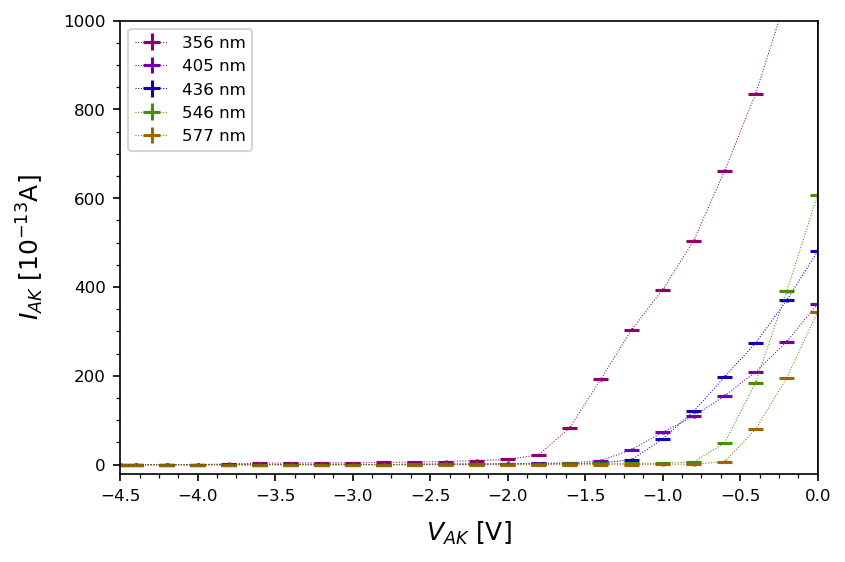

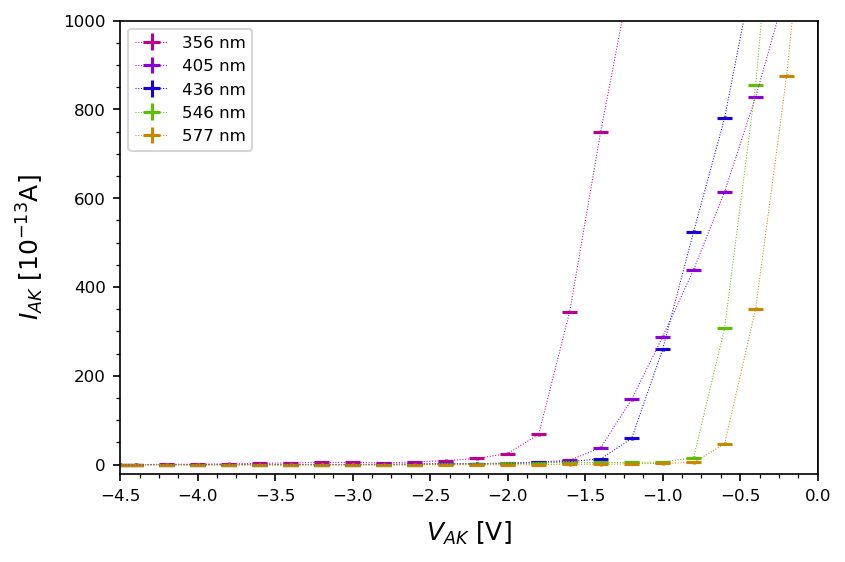

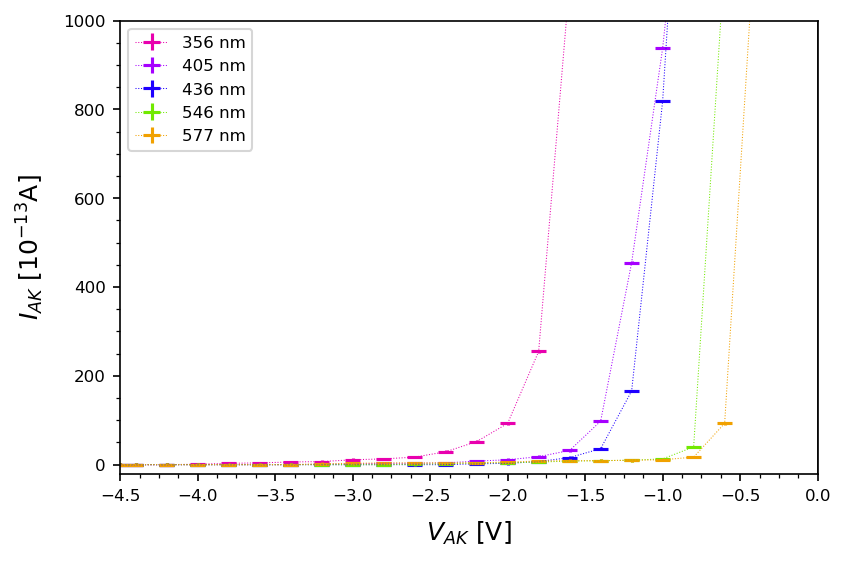

In [20]:
Simple40Plot(tables, apN='ap2', c=colors3)
Simple40Plot(tables, apN='ap4', c=colors2)
Simple40Plot(tables, apN='ap8', c=colors1)

In [21]:
def WaveToColorIdx(wave: str) -> int : 
    if(wave=='356') : return 0
    if(wave=='405') : return 1
    if(wave=='436') : return 2
    if(wave=='546') : return 3
    if(wave=='577') : return 4
    return 0

In [22]:
def AperturePlot(tables, wave) : 
    ci = WaveToColorIdx(wave)
    PlotXmanyY(
        x = [tables['ap2']['VAK [V]'],
             tables['ap4']['VAK [V]'],
             tables['ap8']['VAK [V]']],
        y = [
            tables['ap2']['I_'+str(wave)+' [1e-13 A]'], 
            tables['ap4']['I_'+str(wave)+' [1e-13 A]'], 
            tables['ap8']['I_'+str(wave)+' [1e-13 A]'], 
        ],
        yleg = [ 'Ø2', 'Ø4', 'Ø8'],
        c = [ colors3[ci], colors2[ci], colors1[ci],],
        vlines = [0],
        xerr = 0.05,
        yerr = 3,
        xlab = '$V_{AK}$ [V]',
        ylab = '$I_{'+str(wave)+'nm}$ [$10^{-13}$A]',
        linestyle = ':',
        xlim = (-3.5, 0),
        ylim = (-20, 1000),
        fileName = my.path_fig + 'ap248_'+str(wave)+'.png'
    )

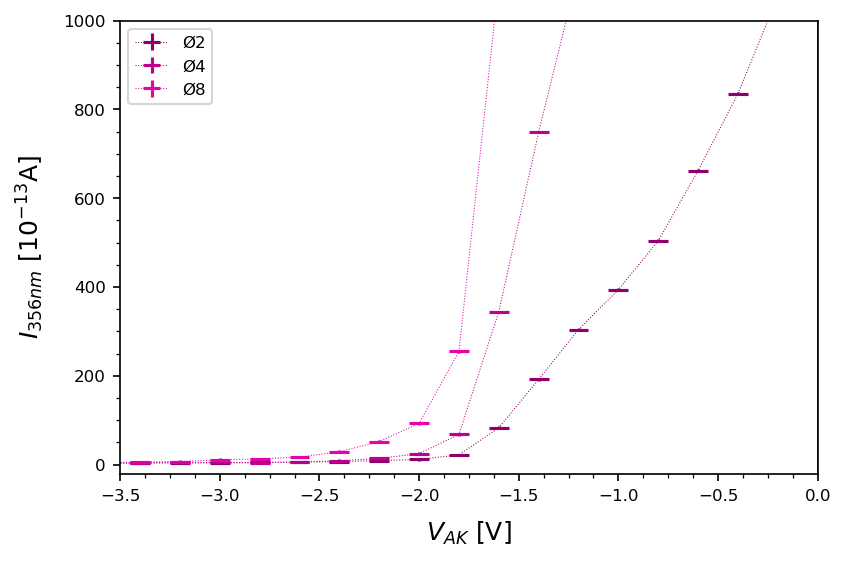

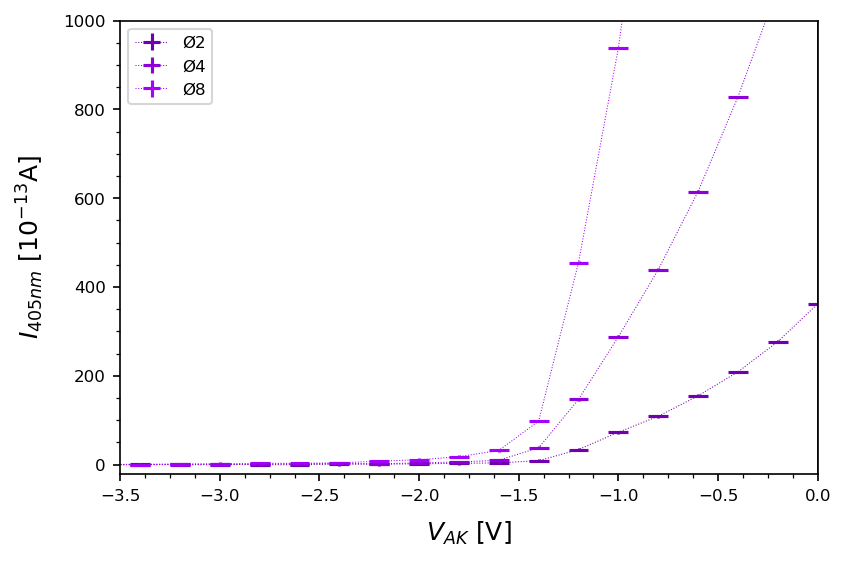

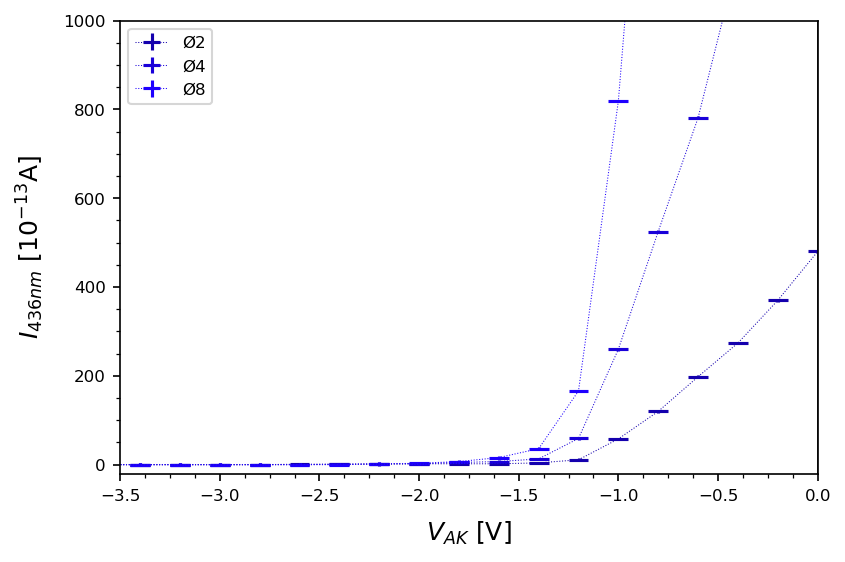

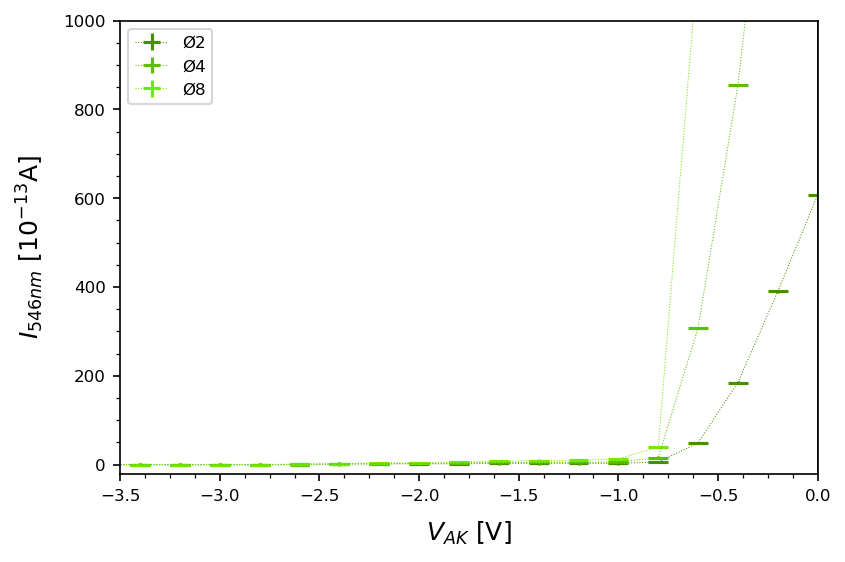

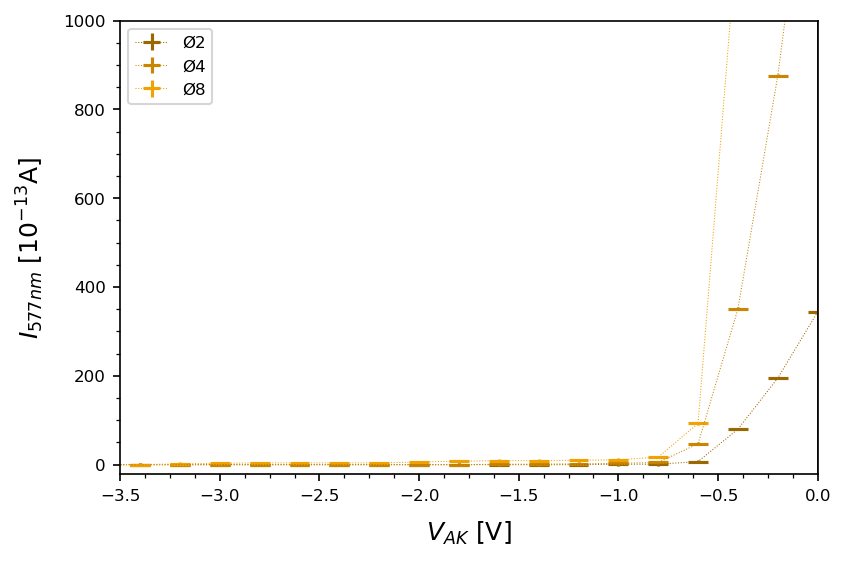

In [23]:
AperturePlot(tables, '356')
AperturePlot(tables, '405')
AperturePlot(tables, '436')
AperturePlot(tables, '546')
AperturePlot(tables, '577')

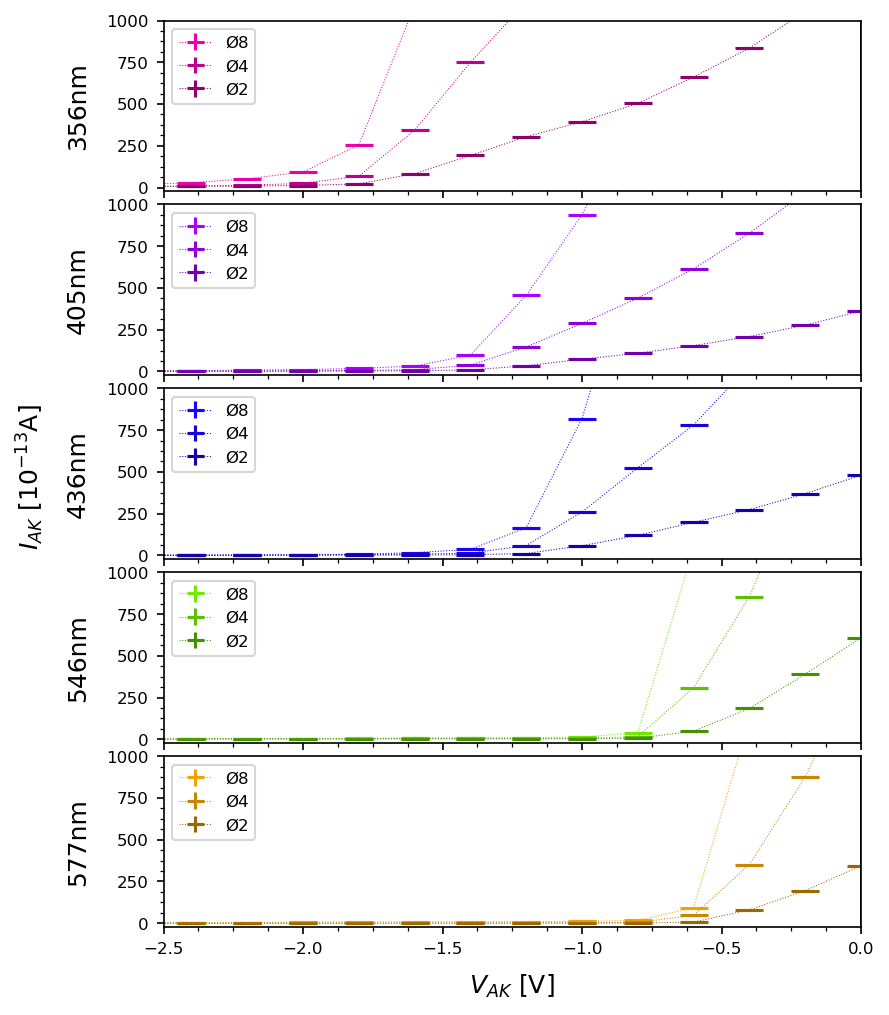

In [24]:
def ax_simplePlotXmanyY(
    ax,
    x: list[np.array], # x axis data points
    y: list[np.array], # y axis data points
    yleg : list[str], # legend lables 
    c : list, # colors
    ylab : str = '', 
    vlines: list[float] = [], # plot vertical lines
    xerr: float = 0,    # error on x axis
    yerr: float = 0,    # error on y axis
    linestyle = '-',   # style of xy curve line
) : 
    """Plotting function for x and y data arrays."""
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    if(ylab != '') : ax.set_ylabel(ylab)
    for v in vlines : 
        ax.axvline(v, c='k',linewidth=0.8)
    # data
    for xi,yi,yl,ci in zip(x,y,yleg,c) : 
        xx, yy = MaskNan(xi,yi)
        ax.errorbar(xx, yy, yerr=yerr, xerr=xerr, elinewidth=1.5, c=ci, linestyle=linestyle, linewidth=0.5, label=yl)
    if( yleg[0] != None) : ax.legend(loc='upper left')

def ax_AperturePlot(ax, tables, wave) : 
    ci = WaveToColorIdx(wave)
    ax_simplePlotXmanyY(
        ax = ax, 
        x = [tables['ap8']['VAK [V]'],
             tables['ap4']['VAK [V]'],
             tables['ap2']['VAK [V]']],
        y = [
            tables['ap8']['I_'+str(wave)+' [1e-13 A]'], 
            tables['ap4']['I_'+str(wave)+' [1e-13 A]'], 
            tables['ap2']['I_'+str(wave)+' [1e-13 A]'], 
        ],
        yleg = [ 'Ø8', 'Ø4', 'Ø2'],
        ylab = str(wave)+'nm',
        c = [ colors1[ci], colors2[ci], colors3[ci]],
        vlines = [0],
        xerr = 0.05,
        yerr = 3,
        linestyle = ':',
    )

def FiveAperturePlot(
    tables, 
    fileName=''
) : 
    # start figure 
    my.SetStyle()
    fig, axs = plt.subplots(nrows=5, ncols=1, sharex=True, sharey=True)
    fig.set_figheight(8)
    # fig.set_figwidth(6.75)
    fig.subplots_adjust(hspace=0.08,wspace=0.08)
    # lables and ticks 
    fig.supylabel('$I_{AK}$ [$10^{-13}$A]',x=-0.04)
    axs[4].set_xlabel('$V_{AK}$ [V]')
    axs[0].set_xlim(-2.5, 0)
    axs[0].set_ylim(-20, 1000)
    axs[0].xaxis.set_minor_locator(AutoMinorLocator(4))
    axs[0].yaxis.set_minor_locator(AutoMinorLocator(4))
    # plot
    ax_AperturePlot(axs[0], tables, '356')
    ax_AperturePlot(axs[1], tables, '405')
    ax_AperturePlot(axs[2], tables, '436')
    ax_AperturePlot(axs[3], tables, '546')
    ax_AperturePlot(axs[4], tables, '577')
    # finish 
    if(fileName != '') : my.Save(fileName)
    plt.show()

FiveAperturePlot(tables, fileName=my.path_fig+'ap248_allWave.png')